In [1]:
tree = "prod"

## File I/O piplines

### Imports and Directory loading

In [2]:
import pathlib
import numpy as np
import librosa as rosa
import pandas as pd

In [3]:
fileiocheck = False
working_dir = ''
sub_dirs = []
paths = []
def load_dirs(tree:str) -> None:
    global working_dir,sub_dirs,paths
    if tree=="dev":
        working_dir = "sampling_hunger/"
        sub_dirs = []
        paths = [pathlib.Path(working_dir)]
    elif tree=="prod":
        working_dir = "audio/"
        sub_dirs = ['discomfort','hunger','pain']
        paths  = [pathlib.Path(working_dir+dir) for dir in sub_dirs]

In [4]:
# print(paths)

### AudIO Classes

In [5]:
from audio import AudIO

### Basic tests

In [6]:
load_dirs(tree="prod")
aio = AudIO(paths=paths)
audios = aio.getAllAudios()
print(audios)

[((array([ 0.03939373,  0.0601788 ,  0.0495783 , ..., -0.01272201,
       -0.01395789, -0.00883116], dtype=float32), 22050), 'audio\\discomfort'), ((array([0.17617908, 0.37023246, 0.46158892, ..., 0.03994034, 0.04031325,
       0.02263961], dtype=float32), 22050), 'audio\\discomfort'), ((array([-0.02708368, -0.04876096, -0.0825662 , ..., -0.01657588,
       -0.0125604 , -0.00529859], dtype=float32), 22050), 'audio\\discomfort'), ((array([-0.02731055, -0.04533367, -0.0485687 , ..., -0.00110541,
       -0.0050378 ,  0.00219741], dtype=float32), 22050), 'audio\\discomfort'), ((array([ 0.03183655,  0.06648411,  0.08384795, ..., -0.00329806,
       -0.00341501, -0.00302807], dtype=float32), 22050), 'audio\\discomfort'), ((array([-0.02323911, -0.03233995, -0.02350015, ..., -0.05520211,
       -0.04900819, -0.04575604], dtype=float32), 22050), 'audio\\discomfort'), ((array([ 0.08910049,  0.11723736,  0.11454027, ...,  0.04717757,
       -0.0649368 , -0.23439106], dtype=float32), 22050), 'audi

In [7]:
load_dirs(tree="dev")
aio = AudIO(paths=paths)
audios = aio.getAllAudios()
print(audios)

[((array([-0.02168059, -0.02516536, -0.01919359, ...,  0.04178072,
        0.04001644,  0.04387902], dtype=float32), 22050), 'sampling_hunger'), ((array([0.05001208, 0.07300287, 0.07227496, ..., 0.03721377, 0.03015154,
       0.02150325], dtype=float32), 22050), 'sampling_hunger')]


In [8]:
load_dirs(tree=tree)
aio = AudIO(paths=paths)
audios = aio.getAllAudios()
print(audios)
fileiocheck = True

[((array([ 0.03939373,  0.0601788 ,  0.0495783 , ..., -0.01272201,
       -0.01395789, -0.00883116], dtype=float32), 22050), 'audio\\discomfort'), ((array([0.17617908, 0.37023246, 0.46158892, ..., 0.03994034, 0.04031325,
       0.02263961], dtype=float32), 22050), 'audio\\discomfort'), ((array([-0.02708368, -0.04876096, -0.0825662 , ..., -0.01657588,
       -0.0125604 , -0.00529859], dtype=float32), 22050), 'audio\\discomfort'), ((array([-0.02731055, -0.04533367, -0.0485687 , ..., -0.00110541,
       -0.0050378 ,  0.00219741], dtype=float32), 22050), 'audio\\discomfort'), ((array([ 0.03183655,  0.06648411,  0.08384795, ..., -0.00329806,
       -0.00341501, -0.00302807], dtype=float32), 22050), 'audio\\discomfort'), ((array([-0.02323911, -0.03233995, -0.02350015, ..., -0.05520211,
       -0.04900819, -0.04575604], dtype=float32), 22050), 'audio\\discomfort'), ((array([ 0.08910049,  0.11723736,  0.11454027, ...,  0.04717757,
       -0.0649368 , -0.23439106], dtype=float32), 22050), 'audi

## Note: The Basic Pipline is ready:

### Follow these steps to load the audio files

- call the function `load_dirs(tree)` where you can use `prod` to get all audios or `dev` to use audios listed under `sampling` folder
- create `AudIO` obj pass `paths` variable (its been declared in FileIO in global scope)
- call `AudIO.getAllAudios()` to get a list of tuples `(y, sr)`

> y: np.ndarray [shape=(n,) or (…, n)]
> audio time series. Multi-channel is supported.
> 
> sr: number > 0 [scalar]
> sampling rate of y

### vars in global scope that can be used:
- paths -> paths to available audios
- audios -> paths to avaiable loaded audios

## MelSpectrumIO pipline

### Imports

In [9]:
import librosa as rosa
import matplotlib.pyplot as plt
import numpy as np

if not fileiocheck:
    raise Exception(BrokenPipeError("FileIO pipeline wasn't excecuted or failed the tests"))

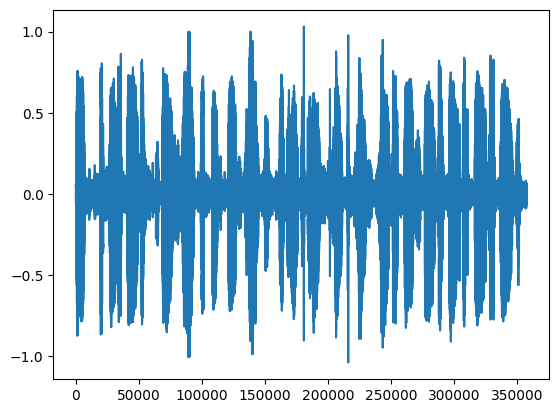

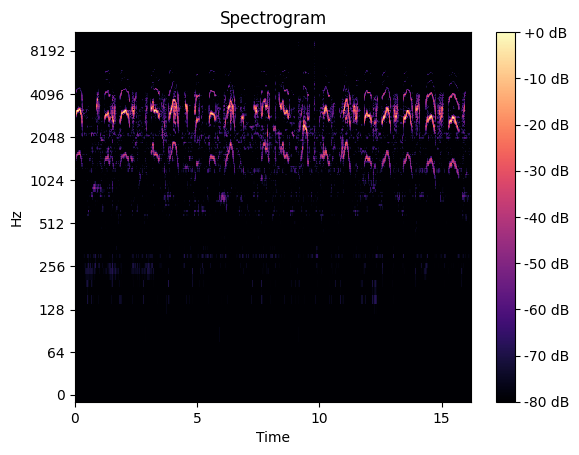

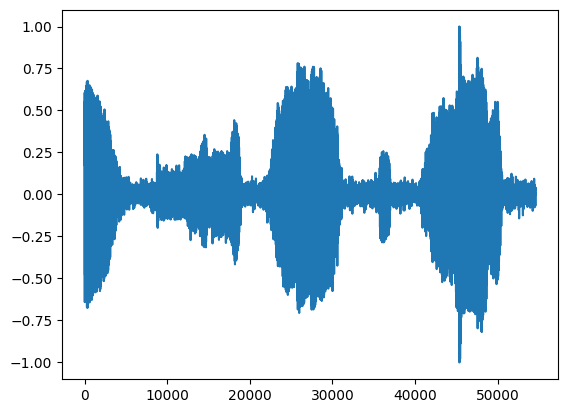

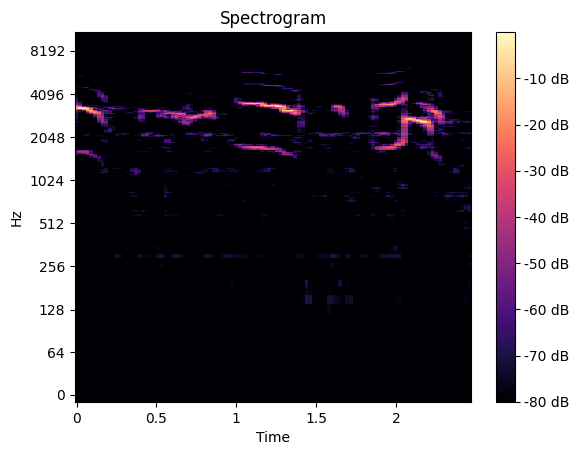

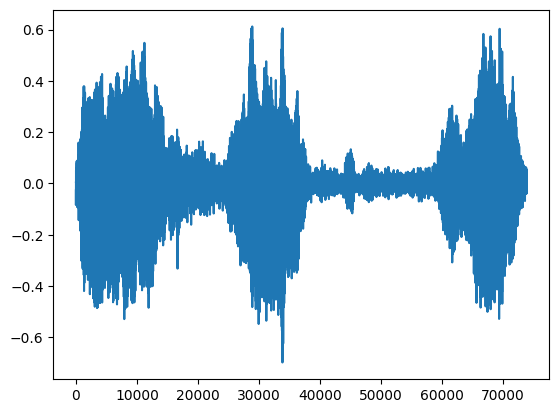

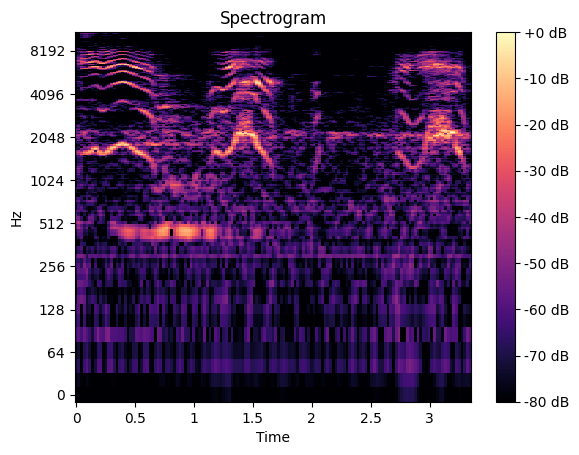

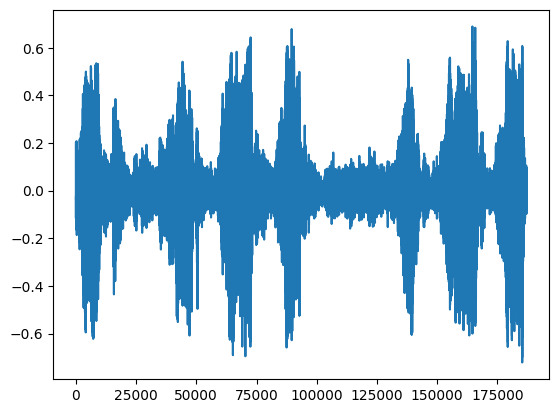

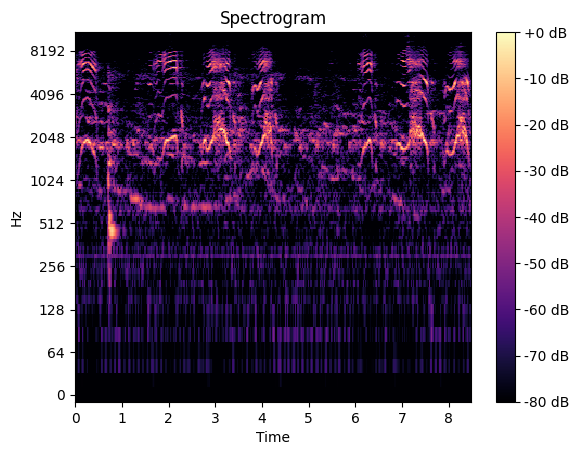

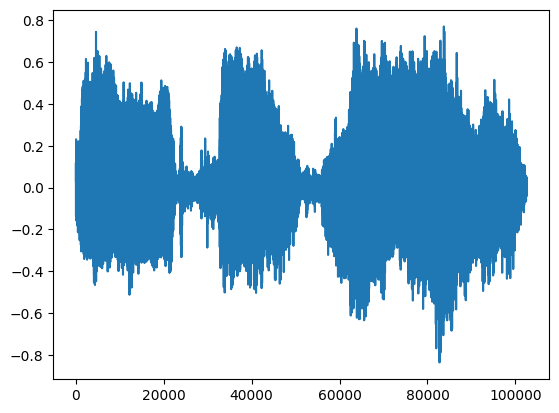

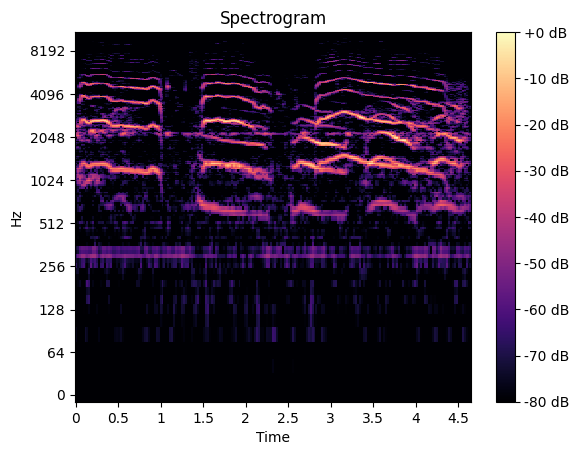

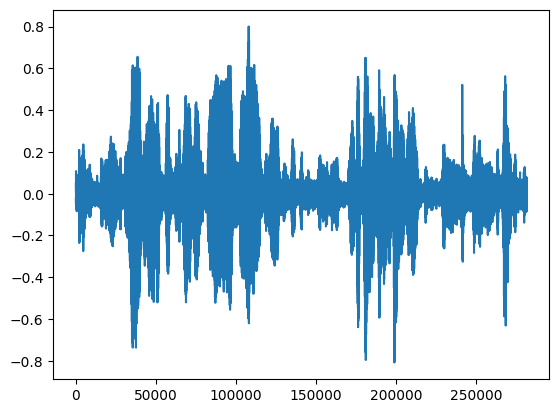

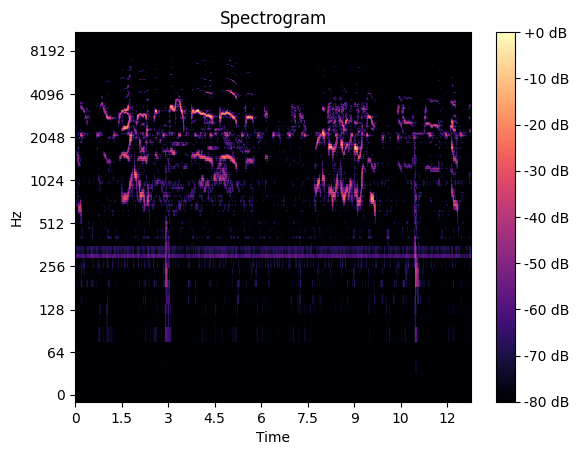

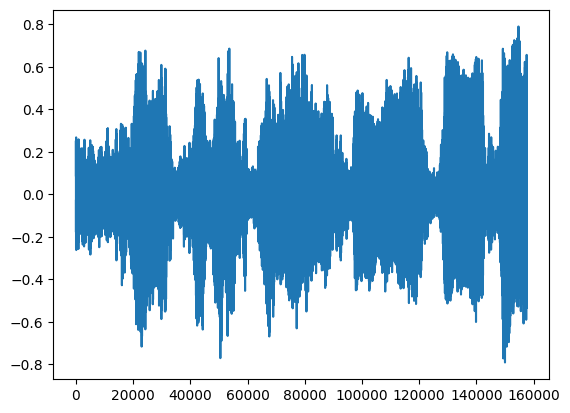

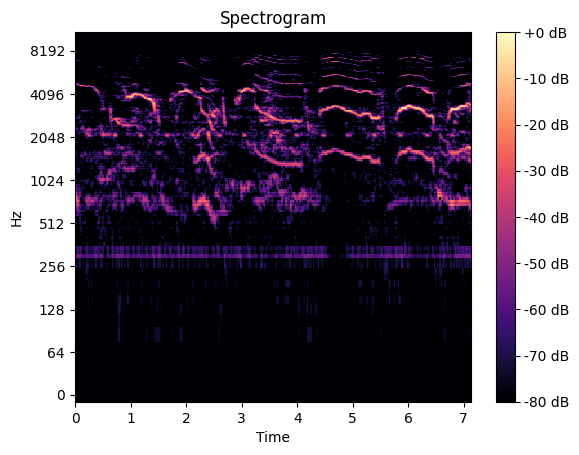

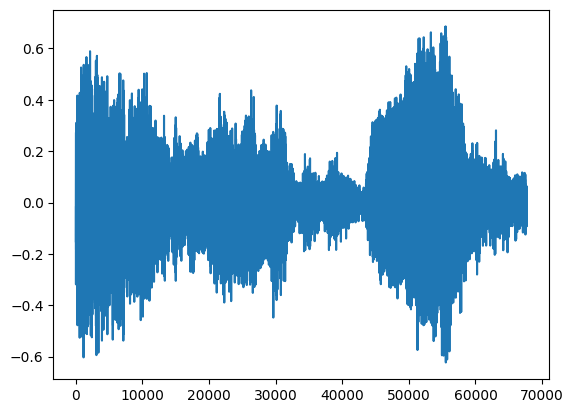

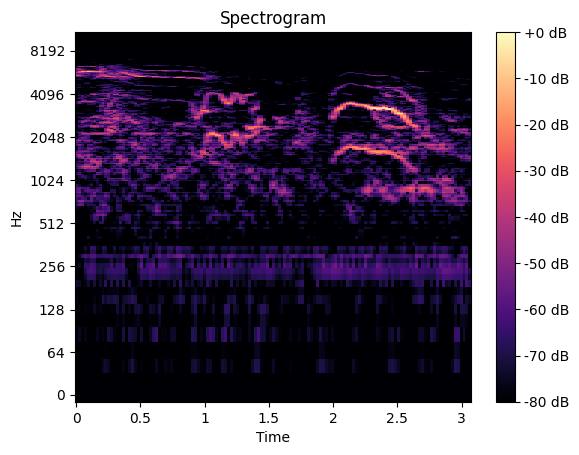

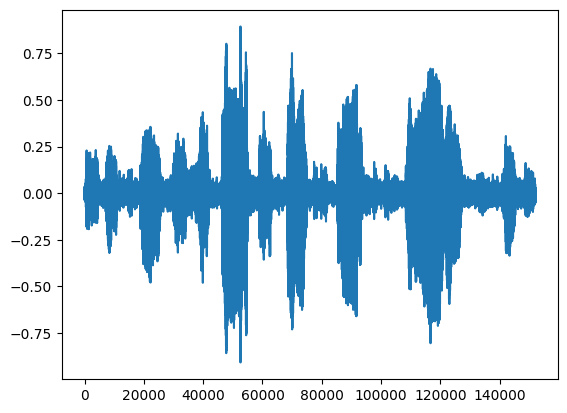

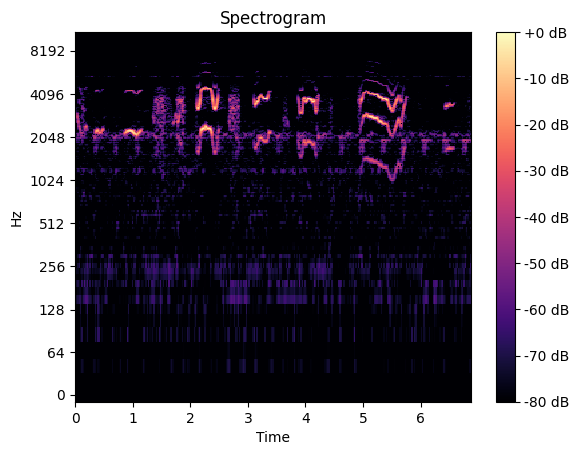

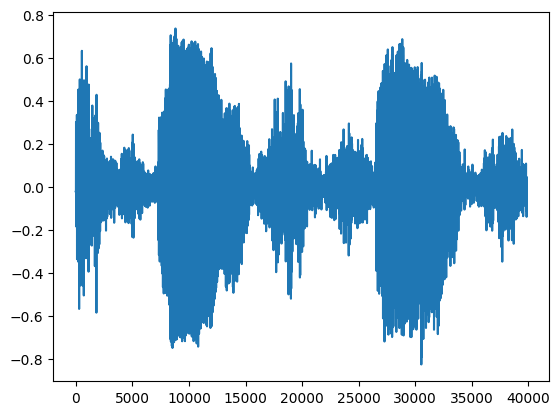

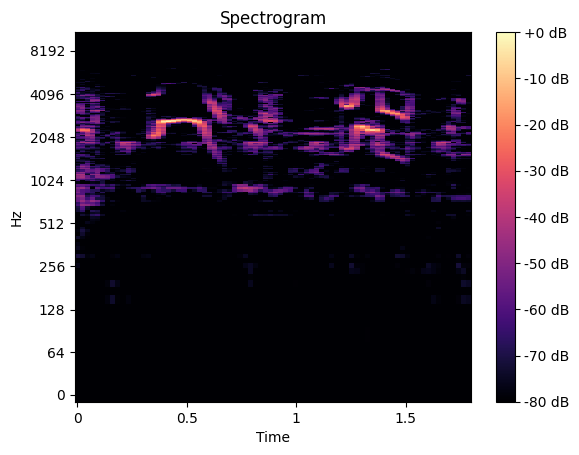

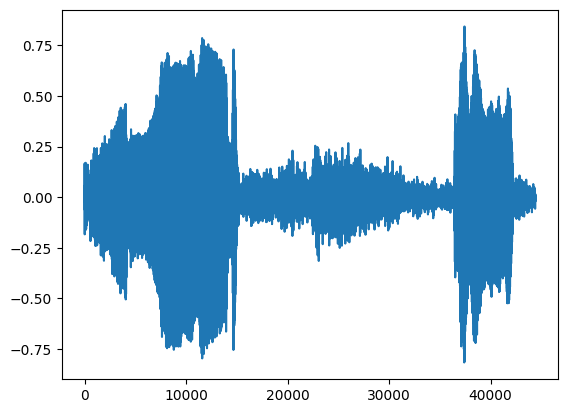

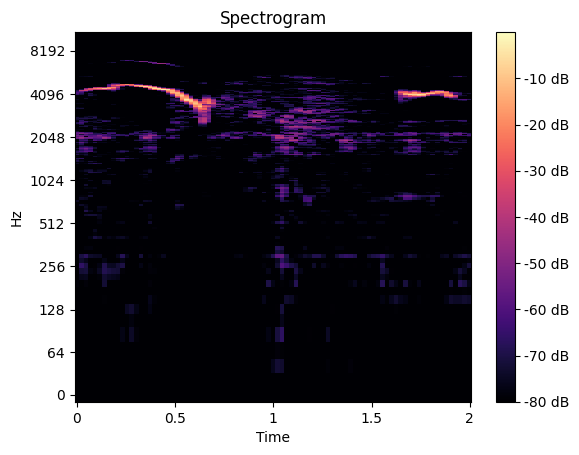

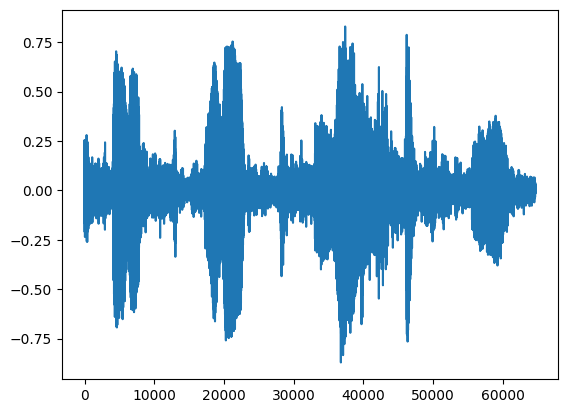

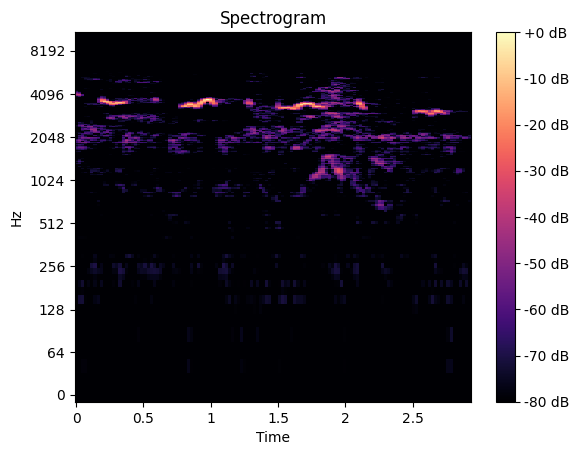

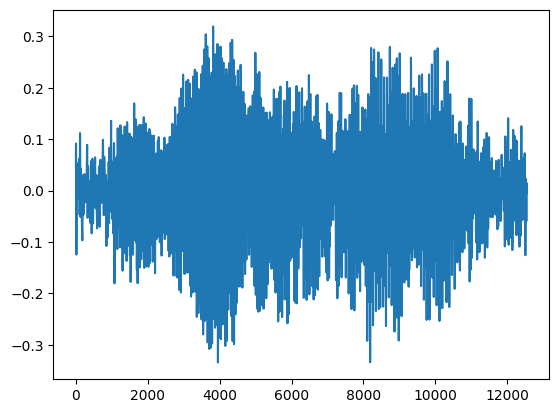

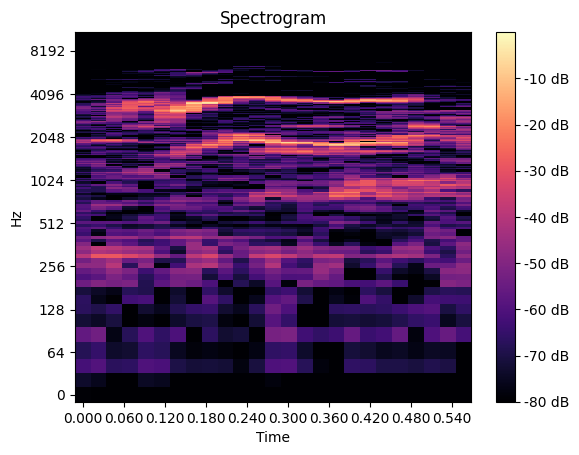

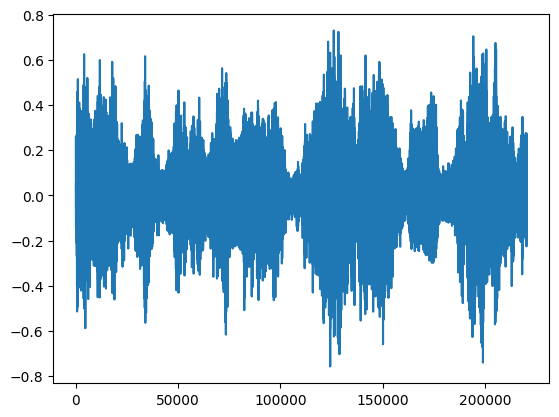

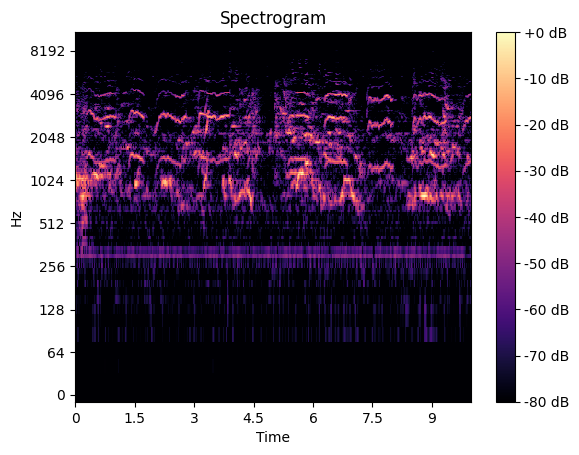

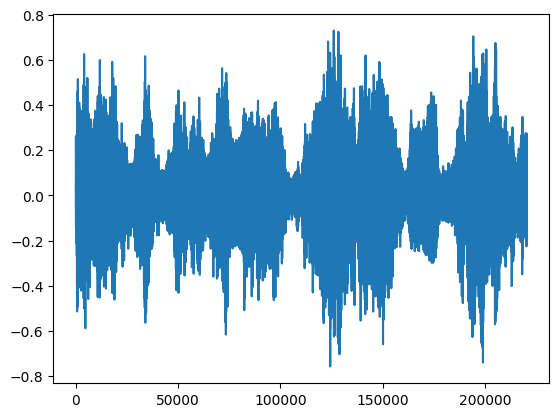

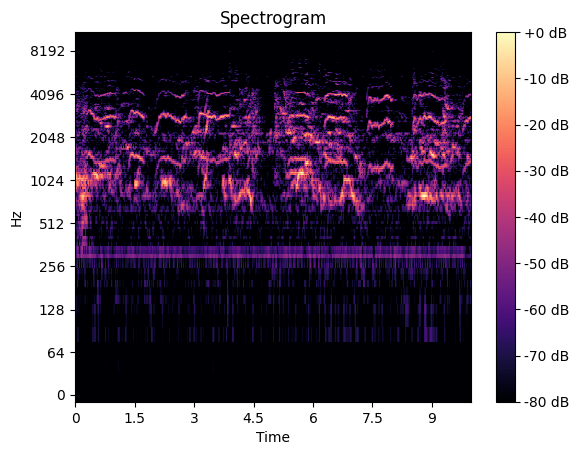

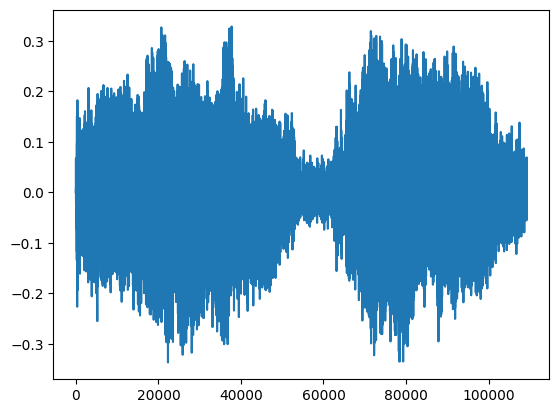

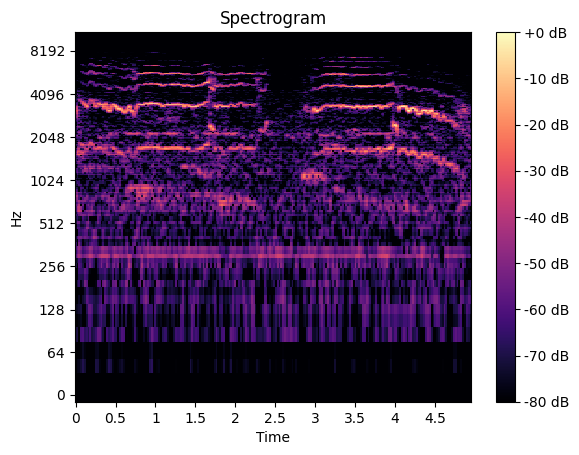

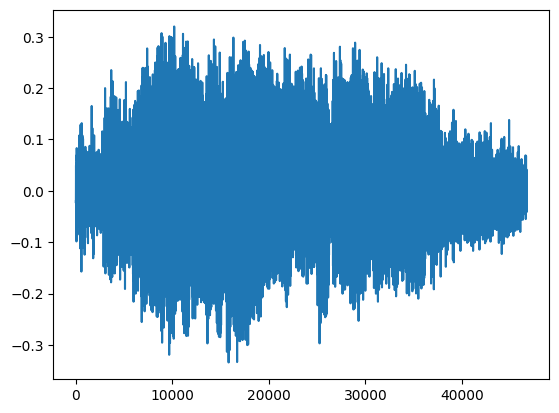

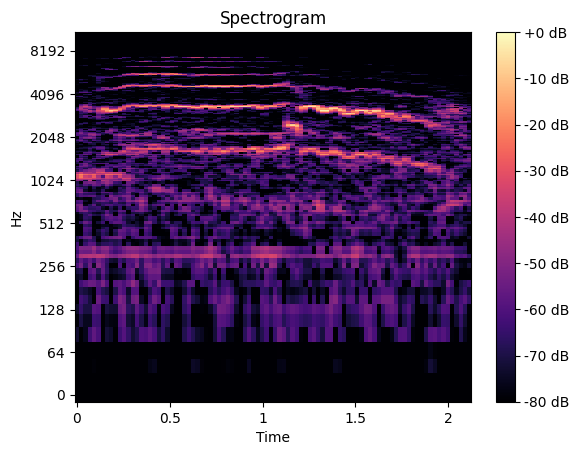

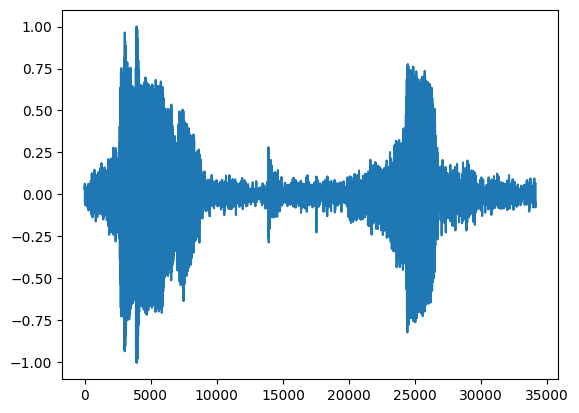

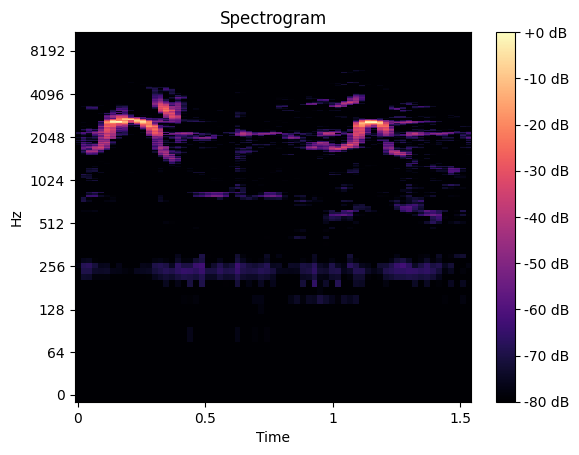

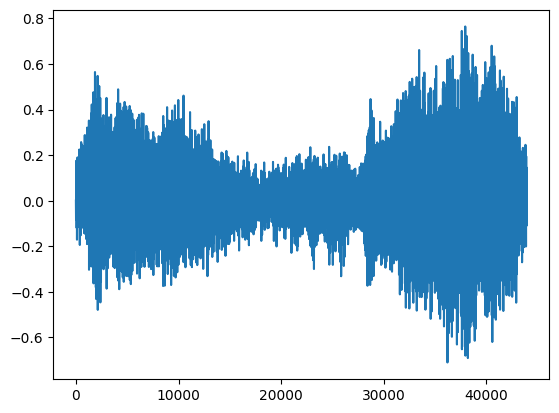

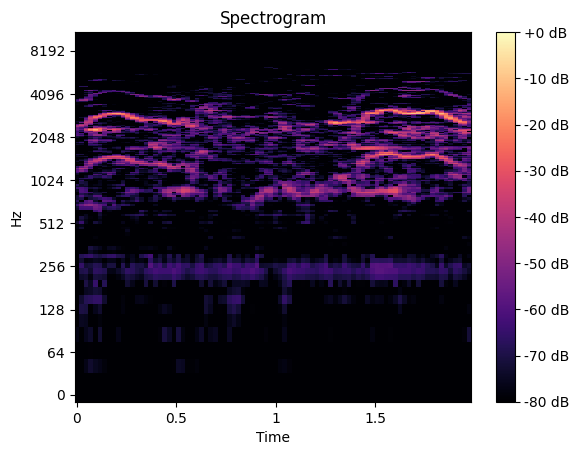

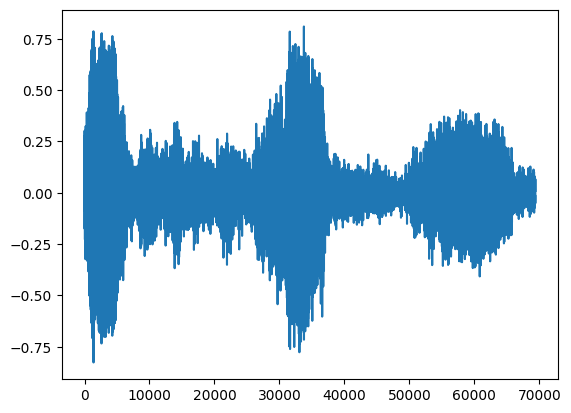

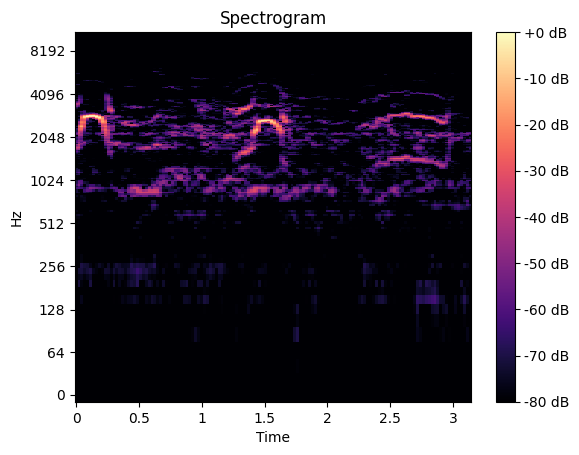

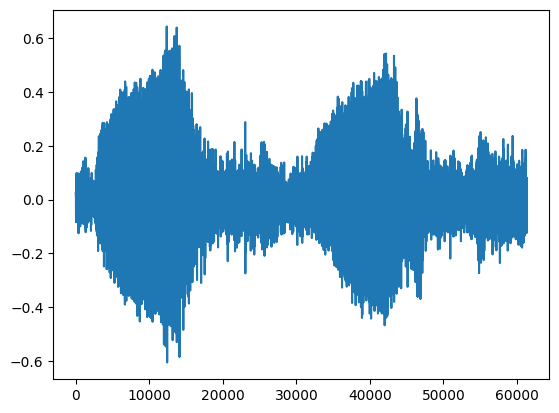

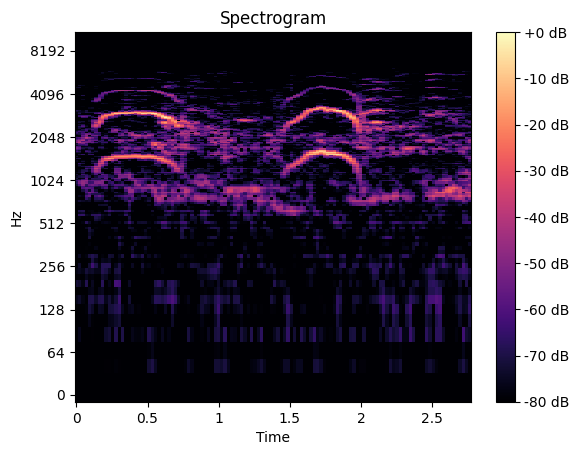

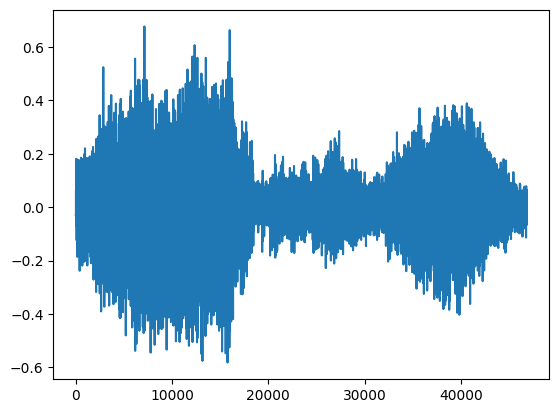

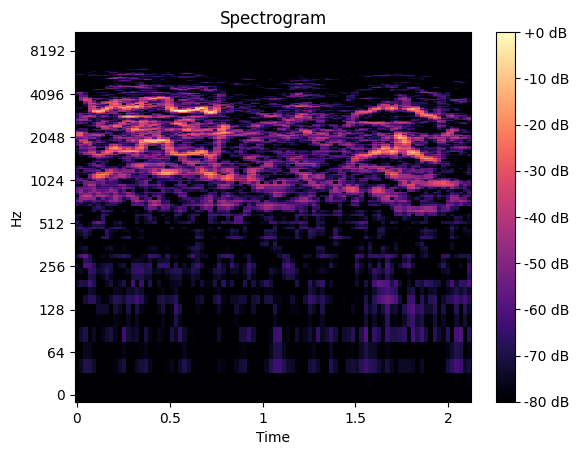

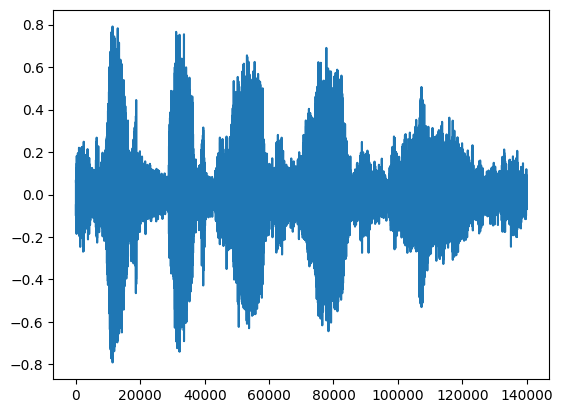

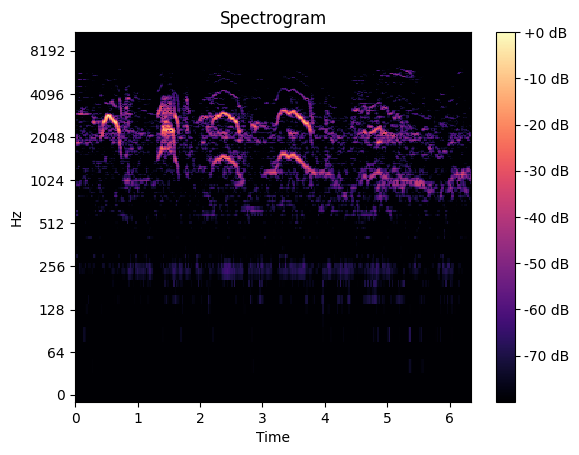

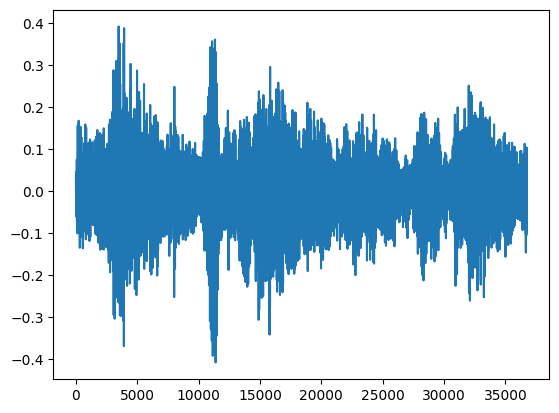

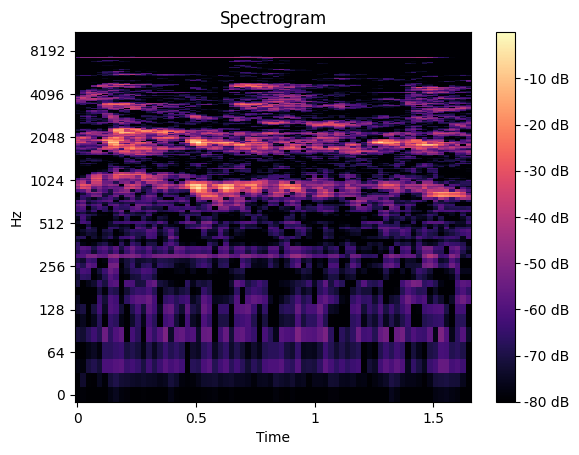

In [10]:
for audio in audios:
    audio,type_of_cry = audio
    y,sr = audio
    pd.Series(y).plot()
    plt.show()
    # Generate spectrogram
    D = rosa.stft(y)
    S = rosa.amplitude_to_db(abs(D), ref=np.max)

    # Visualize spectrogram
    # rosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('Spectrogram')
    # plt.show()

    S = rosa.feature.melspectrogram(y=y,sr=sr,n_mels=128*4)
    S = rosa.amplitude_to_db(S, ref=np.max)
    rosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

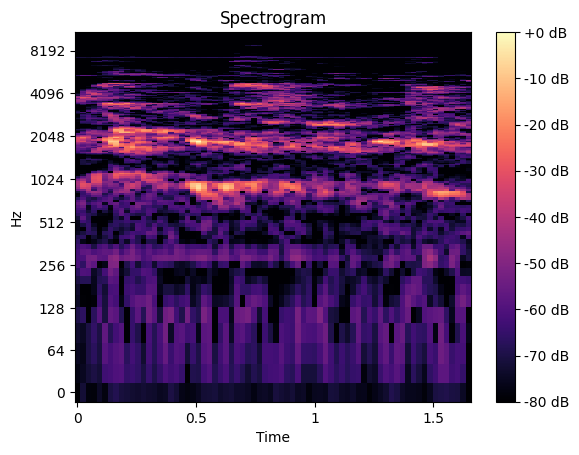

In [11]:
S = rosa.feature.melspectrogram(y=y,sr=sr,n_mels=128*3)
Sdb = rosa.amplitude_to_db(S, ref=np.max)
rosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

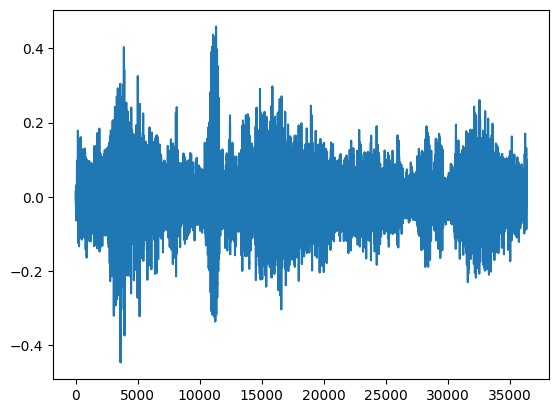

In [12]:
from IPython.display import Audio
y_inv = rosa.feature.inverse.mel_to_audio(S)
pd.Series(y_inv).plot()
Audio(data=y_inv, rate=sr)

In [13]:
# TODO: go over the research papers again and find the right audio duraction time and which specturm that has been used.. most probably mel log spec.

### Basic Tests

# CNN Model

In [14]:
import tensorflow as tf
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [25]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

# Step 1: Data Preprocessing
# Assuming you have loaded the dataset and labels into 'data' and 'labels' lists

enc_d = {"hunger":0,"discomfort":1,"pain":2}

# Extract features (e.g., MFCCs or spectrograms) from audio files
def extract_features(data):
    features = []
    max_length = 128  # Specify the maximum length of audio segments
    for audio in data:
        audio,type_of_cry = audio
        audio,sr = audio
        # Divide the audio into fixed-length segments
        segments = librosa.effects.split(audio, top_db=30)
        for start, end in segments:
            segment = audio[start:end]
            # Use Librosa to extract MFCCs from each segment
            mfccs = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)
            # Pad or truncate MFCCs to a fixed length
            if mfccs.shape[1] < max_length:
                pad_width = max_length - mfccs.shape[1]
                mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), mode='constant')
            else:
                mfccs = mfccs[:, :max_length]
            features.append(mfccs)
    return features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(audios, audios, test_size=0.2, random_state=42)

def extract_labels(data):
    labels = []
    for audio in audios:
        _,l = audio
        labels.append(l)
    return labels

y_train = extract_labels(y_train)
y_test = extract_labels(y_test)

# Preprocess training and testing data
X_train_processed = extract_features(X_train)
X_test_processed = extract_features(X_test)

# Convert features to numpy arrays
X_train_processed = np.array(X_train_processed)
X_test_processed = np.array(X_test_processed)
X_train_processed = np.array(X_train_processed)
X_test_processed = np.array(X_test_processed)

X_train_processed = np.array(X_train_processed).astype('float32')
X_test_processed = np.array(X_test_processed).astype('float32')
X_train_processed = tf.convert_to_tensor(X_train_processed)
X_test_processed = tf.convert_to_tensor(X_test_processed)


# Reshape features to include the channel dimension (assuming mono audio)
X_train_processed = X_train_processed.reshape(-1, X_train_processed.shape[1], X_train_processed.shape[2], 1)
X_test_processed = X_test_processed.reshape(-1, X_test_processed.shape[1], X_test_processed.shape[2], 1)
# Step 2: Building the CNN Model
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=X_train_processed[0].shape),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Step 3: Training the Model

print("Shape of X_train_processed:", X_train_processed.shape)

print("Shape of X_test_processed:", X_test_processed.shape)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Shape of X_train_processed: (19, 13, 128, 1)
Shape of X_test_processed: (5, 13, 128, 1)


In [21]:
X_train_processed

<tf.Tensor: shape=(19, 13, 128, 1), dtype=float32, numpy=
array([[[[-107.784195  ],
         [ -84.56899   ],
         [-101.60701   ],
         ...,
         [   0.        ],
         [   0.        ],
         [   0.        ]],

        [[ 191.65231   ],
         [ 193.14851   ],
         [ 187.95523   ],
         ...,
         [   0.        ],
         [   0.        ],
         [   0.        ]],

        [[ -48.560898  ],
         [ -54.36469   ],
         [ -56.677826  ],
         ...,
         [   0.        ],
         [   0.        ],
         [   0.        ]],

        ...,

        [[  -9.057068  ],
         [  -5.664697  ],
         [   2.1859243 ],
         ...,
         [   0.        ],
         [   0.        ],
         [   0.        ]],

        [[  -1.0936217 ],
         [  -1.7331932 ],
         [   6.7876706 ],
         ...,
         [   0.        ],
         [   0.        ],
         [   0.        ]],

        [[  -5.1300592 ],
         [ -10.5847435 ],
         [  -4.1

In [22]:
import tensorflow as tf

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train_processed, y=y_train, epochs=10, batch_size=32, validation_data=(X_test_processed, y_test))

# Step 4: Evaluating the Model
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print(f'Test Accuracy: {test_accuracy}')

ValueError: Unrecognized data type: x=[[[[-107.784195  ]
   [ -84.56899   ]
   [-101.60701   ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[ 191.65231   ]
   [ 193.14851   ]
   [ 187.95523   ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[ -48.560898  ]
   [ -54.36469   ]
   [ -56.677826  ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  ...

  [[  -9.057068  ]
   [  -5.664697  ]
   [   2.1859243 ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[  -1.0936217 ]
   [  -1.7331932 ]
   [   6.7876706 ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[  -5.1300592 ]
   [ -10.5847435 ]
   [  -4.190536  ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]]


 [[[-163.3673    ]
   [-142.44023   ]
   [-148.76007   ]
   ...
   [-203.48564   ]
   [-199.339     ]
   [-204.62224   ]]

  [[ 178.56458   ]
   [ 191.11792   ]
   [ 196.81184   ]
   ...
   [ 168.86584   ]
   [ 169.24759   ]
   [ 173.73155   ]]

  [[ -22.911583  ]
   [ -38.207184  ]
   [ -37.614914  ]
   ...
   [ -18.819752  ]
   [ -17.984367  ]
   [ -14.356398  ]]

  ...

  [[ -17.265278  ]
   [ -17.436687  ]
   [ -15.040662  ]
   ...
   [   2.7401156 ]
   [   5.0257125 ]
   [   6.93084   ]]

  [[ -10.66431   ]
   [ -12.55372   ]
   [ -13.869988  ]
   ...
   [   2.7922387 ]
   [   7.668626  ]
   [  12.199879  ]]

  [[ -13.444931  ]
   [ -12.080912  ]
   [ -12.956366  ]
   ...
   [ -12.567591  ]
   [  -9.075844  ]
   [  -2.2363572 ]]]


 [[[-138.25742   ]
   [-186.97899   ]
   [-258.9262    ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[ 155.61287   ]
   [ 158.05182   ]
   [ 162.21909   ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[ -45.959625  ]
   [ -48.119053  ]
   [ -22.919575  ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  ...

  [[ -15.198011  ]
   [ -17.203518  ]
   [ -18.528326  ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[  -3.1212482 ]
   [  -1.3021923 ]
   [  -1.1108199 ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[   6.124284  ]
   [   3.2033691 ]
   [  -7.7102766 ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]]


 ...


 [[[-163.3705    ]
   [-142.44385   ]
   [-148.76236   ]
   ...
   [-203.47235   ]
   [-199.33531   ]
   [-204.62323   ]]

  [[ 178.56946   ]
   [ 191.12285   ]
   [ 196.81506   ]
   ...
   [ 168.84813   ]
   [ 169.24303   ]
   [ 173.73297   ]]

  [[ -22.91748   ]
   [ -38.212025  ]
   [ -37.61821   ]
   ...
   [ -18.804995  ]
   [ -17.980698  ]
   [ -14.357231  ]]

  ...

  [[ -17.2711    ]
   [ -17.444843  ]
   [ -15.041073  ]
   ...
   [   2.740342  ]
   [   5.0330725 ]
   [   6.93289   ]]

  [[ -10.65909   ]
   [ -12.545931  ]
   [ -13.871887  ]
   ...
   [   2.791638  ]
   [   7.659917  ]
   [  12.198554  ]]

  [[ -13.449606  ]
   [ -12.087954  ]
   [ -12.951822  ]
   ...
   [ -12.566198  ]
   [  -9.067139  ]
   [  -2.2366426 ]]]


 [[[-182.14594   ]
   [-146.16518   ]
   [-147.76157   ]
   ...
   [-194.93506   ]
   [-200.82881   ]
   [-195.1348    ]]

  [[ 190.69498   ]
   [ 208.09732   ]
   [ 209.84735   ]
   ...
   [ 190.78513   ]
   [ 188.63042   ]
   [ 197.26053   ]]

  [[ -33.49633   ]
   [ -42.650837  ]
   [ -41.991646  ]
   ...
   [ -23.83233   ]
   [ -24.2952    ]
   [ -20.815434  ]]

  ...

  [[ -12.006674  ]
   [   2.2221093 ]
   [   9.4337225 ]
   ...
   [   2.4522502 ]
   [  -3.849855  ]
   [  -4.3837643 ]]

  [[   8.959951  ]
   [  20.006496  ]
   [  12.248581  ]
   ...
   [   2.0130002 ]
   [  -1.4118167 ]
   [  -1.4752123 ]]

  [[  10.713443  ]
   [  11.587002  ]
   [  -6.959664  ]
   ...
   [  -9.239374  ]
   [  -8.097791  ]
   [  -7.190297  ]]]


 [[[-172.5421    ]
   [-176.2979    ]
   [-197.48305   ]
   ...
   [-163.90218   ]
   [-147.82727   ]
   [-131.52417   ]]

  [[ 143.69241   ]
   [ 150.14389   ]
   [ 154.19614   ]
   ...
   [ 133.47623   ]
   [ 122.79248   ]
   [ 114.65661   ]]

  [[  -7.0151606 ]
   [ -11.997113  ]
   [ -12.460796  ]
   ...
   [ -38.361763  ]
   [ -43.324013  ]
   [ -57.635094  ]]

  ...

  [[  -7.487357  ]
   [  -5.9587264 ]
   [  -4.2359195 ]
   ...
   [ -26.7178    ]
   [ -17.87088   ]
   [  -5.3463783 ]]

  [[ -27.826458  ]
   [ -27.52335   ]
   [ -23.63164   ]
   ...
   [  -6.965502  ]
   [  -0.6798898 ]
   [   0.96203756]]

  [[ -17.648224  ]
   [ -16.315542  ]
   [ -16.709576  ]
   ...
   [  30.54649   ]
   [  25.38609   ]
   [  16.84583   ]]]] (of type <class 'tensorflow.python.framework.ops.EagerTensor'>)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a single example of a 4D tensor representing an image
# Assume grayscale image with dimensions 28x28
image_example = tf.random.normal((1, 28, 28, 1))  # Shape: (batch_size, height, width, channels)

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add more layers...
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Example output layer with 10 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Make predictions on the example
predictions = model.predict(X_train)
print("Predictions:", predictions)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

ValueError: Unrecognized data type: x=[((array([-0.02168059, -0.02516536, -0.01919359, ...,  0.04178072,
        0.04001644,  0.04387902], dtype=float32), 22050), 'audio\\hunger'), ((array([ 0.0510163 ,  0.0421885 , -0.00269699, ..., -0.17701434,
       -0.18120508, -0.20092967], dtype=float32), 22050), 'audio\\hunger'), ((array([0.17617908, 0.37023246, 0.46158892, ..., 0.03994034, 0.04031325,
       0.02263961], dtype=float32), 22050), 'audio\\discomfort'), ((array([-0.03147472, -0.03358972, -0.01818249, ..., -0.02556407,
       -0.04007427, -0.06480576], dtype=float32), 22050), 'audio\\pain'), ((array([-0.02323911, -0.03233995, -0.02350015, ..., -0.05520211,
       -0.04900819, -0.04575604], dtype=float32), 22050), 'audio\\discomfort'), ((array([-0.02708368, -0.04876096, -0.0825662 , ..., -0.01657588,
       -0.0125604 , -0.00529859], dtype=float32), 22050), 'audio\\discomfort'), ((array([ 0.04679988,  0.08088584,  0.08348858, ...,  0.01004099,
        0.00208429, -0.00459646], dtype=float32), 22050), 'audio\\hunger'), ((array([ 0.00502679,  0.00600566,  0.00281945, ...,  0.00212675,
        0.00212273, -0.00512347], dtype=float32), 22050), 'audio\\hunger'), ((array([-0.02731055, -0.04533367, -0.0485687 , ..., -0.00110541,
       -0.0050378 ,  0.00219741], dtype=float32), 22050), 'audio\\discomfort'), ((array([ 0.03183655,  0.06648411,  0.08384795, ..., -0.00329806,
       -0.00341501, -0.00302807], dtype=float32), 22050), 'audio\\discomfort'), ((array([-0.05075452, -0.06943484, -0.0744208 , ...,  0.05027492,
        0.0531651 ,  0.05738875], dtype=float32), 22050), 'audio\\pain'), ((array([ 0.03860322,  0.05459674,  0.04096742, ..., -0.06387705,
       -0.07667491, -0.05184101], dtype=float32), 22050), 'audio\\pain'), ((array([ 0.02024157,  0.02869709,  0.0220777 , ..., -0.05375186,
       -0.06669018, -0.04688594], dtype=float32), 22050), 'audio\\pain'), ((array([ 0.03364813,  0.0264344 , -0.00470455, ..., -0.06574647,
       -0.09756891, -0.07351914], dtype=float32), 22050), 'audio\\pain'), ((array([-0.15104613, -0.14098127,  0.00051248, ..., -0.0618799 ,
       -0.0490181 , -0.04386085], dtype=float32), 22050), 'audio\\hunger'), ((array([-0.02269362, -0.02437151,  0.00397125, ...,  0.00750522,
        0.00247717, -0.00212988], dtype=float32), 22050), 'audio\\hunger'), ((array([ 0.05101019,  0.04219738, -0.00270244, ..., -0.17700395,
       -0.18121114, -0.20091827], dtype=float32), 22050), 'audio\\hunger'), ((array([-0.03692918, -0.04174347, -0.0197409 , ...,  0.04190345,
        0.03012575,  0.00905286], dtype=float32), 22050), 'audio\\pain'), ((array([ 0.08910049,  0.11723736,  0.11454027, ...,  0.04717757,
       -0.0649368 , -0.23439106], dtype=float32), 22050), 'audio\\discomfort')] (of type <class 'list'>)

In [ ]:
print(image_example)

tf.Tensor(
[[[[ 4.05945748e-01]
   [ 1.62624264e+00]
   [ 2.11016703e+00]
   [-6.52052522e-01]
   [ 7.08709657e-01]
   [-1.24751306e+00]
   [ 1.85365185e-01]
   [ 1.66227603e+00]
   [ 3.15056831e-01]
   [ 6.80934250e-01]
   [ 1.21482599e+00]
   [-1.27864408e+00]
   [-2.80522019e-01]
   [-1.00278988e-01]
   [-1.82929903e-01]
   [-7.75535405e-01]
   [ 9.45630908e-01]
   [-1.97480962e-01]
   [-1.16291952e+00]
   [-1.04167171e-01]
   [-1.73568070e+00]
   [-1.67748880e+00]
   [ 1.59695721e+00]
   [-3.46900314e-01]
   [ 1.59559333e+00]
   [ 1.34337378e+00]
   [-1.39165032e+00]
   [-6.35511816e-01]]

  [[ 8.38258862e-01]
   [-7.10008383e-01]
   [ 1.04338479e+00]
   [-7.58905947e-01]
   [-2.68746662e+00]
   [ 4.74019125e-02]
   [-7.89762080e-01]
   [ 7.75110006e-01]
   [ 2.70114690e-01]
   [ 5.66355288e-01]
   [-1.35796487e+00]
   [ 1.90125573e+00]
   [ 6.81288362e-01]
   [-1.65333748e-01]
   [-1.01009166e+00]
   [ 9.95542109e-02]
   [-1.40737152e+00]
   [ 2.71587044e-01]
   [-5.79399228e-01]


In [ ]:
import tensorflow as tf
import numpy as np


data_tf = tf.convert_to_tensor(X_train)
data_tf

ValueError: Can't convert non-rectangular Python sequence to Tensor.